In [742]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [743]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [744]:
df1.drop(['area_type','availability','balcony','society'],axis=1,inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [745]:
df1.shape

(13320, 5)

In [746]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [747]:
df1.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [748]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [749]:
df1.dropna(axis=0,inplace=True)
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [750]:
df1.tail()

,location,size,total_sqft,bath,price
13315,Whitefield,5 Bedroom,3453,4.0,231.0
13316,Richards Town,4 BHK,3600,5.0,400.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0
13319,Doddathoguru,1 BHK,550,1.0,17.0


In [751]:
df1.shape

(13246, 5)

In [752]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [753]:
df1["bhk"]= df1["size"].apply(lambda x: int(x.split(" ")[0]))

In [754]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [755]:
df1["bhk"].dtype

dtype('int64')

In [756]:
df1["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [757]:
df1[df1.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [758]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [759]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True     

In [760]:
df1[~df1["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [761]:
def range_to_num(x):
    data = x.split("-")
    if len(data) ==2:
        return (float(data[0])+float(data[1]))/2
    try:
        return float(x)    
    except:
        return None    

In [762]:
df1["total_sqft"]=df1["total_sqft"].apply(range_to_num)

In [763]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [764]:
df1["price_sqft"] = df1["price"]*100000/df1["total_sqft"]
df1.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [765]:
len(df1["location"].unique())

1304

In [766]:
df1.location=df1.location.apply(lambda x: x.strip())

loc= df1.groupby("location")["location"].agg("count").sort_values(ascending = False)
loc

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [767]:
len(loc[loc<=10])
locless10 =loc[loc<=10]

In [768]:
len(df1.location.unique())

1293

In [769]:
df1.location = df1.location.apply(lambda x:"other" if x in locless10 else x)
len(df1.location.unique())

242

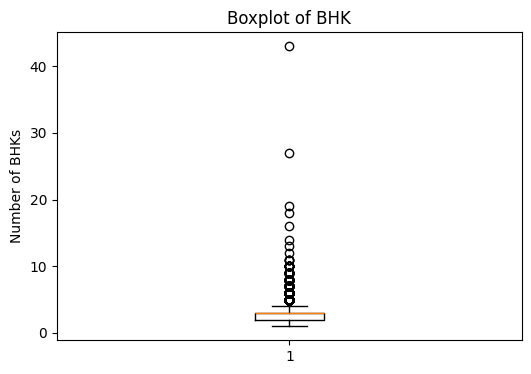

In [770]:
plt.figure(figsize=(6, 4))
plt.boxplot(df1["bhk"])
plt.title("Boxplot of BHK")
plt.ylabel("Number of BHKs")
plt.show()

In [771]:
df1[df1.total_sqft/df1.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [772]:
df1.shape

(13246, 7)

In [773]:
df1=df1[~(df1.total_sqft/df1.bhk<300)]
df1.shape

(12502, 7)

In [774]:
df1.price_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sqft, dtype: float64

In [775]:
# Q1 = df1.groupby('location')['price_sqft'].quantile(0.25)
# Q3 = df1.groupby('location')['price_sqft'].quantile(0.75)
# IQR = Q3 - Q1

# df1['Q1'] = df1['location'].map(Q1)
# df1['Q3'] = df1['location'].map(Q3)
# df1['IQR'] = df1['location'].map(IQR)

# df1['lower_limit'] = df1['Q1'] - 1.5 * df1['IQR']
# df1['upper_limit'] = df1['Q3'] + 1.5 * df1['IQR']

# df1 = df1[(df1['price_sqft'] >= df1['lower_limit']) & (df1['price_sqft'] <= df1['upper_limit'])]

# df1 = df1.drop(columns=['Q1', 'Q3', 'IQR', 'lower_limit', 'upper_limit'])

# df1.shape


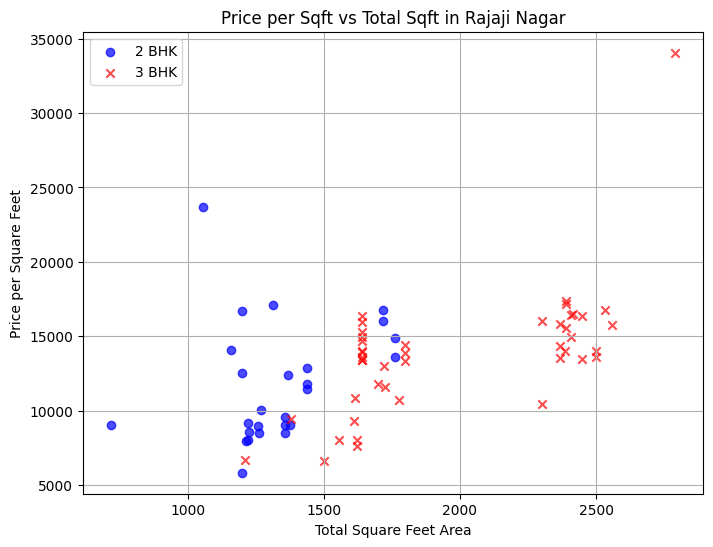

In [776]:
def Draw(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    if bhk2.empty and bhk3.empty:
        print(f"No data available for location: {location}")
        return

    plt.figure(figsize=(8, 6))
    
    if not bhk2.empty:
        plt.scatter(bhk2['total_sqft'], bhk2['price_sqft'],
                    color='blue', marker='o', label='2 BHK', alpha=0.7)

    if not bhk3.empty:
        plt.scatter(bhk3['total_sqft'], bhk3['price_sqft'],
                    color='red', marker='x', label='3 BHK', alpha=0.7)

    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(f'Price per Sqft vs Total Sqft in {location}')
    plt.legend()
    plt.grid(True)
    plt.show()

Draw(df1, "Rajaji Nagar") 

In [777]:
df1.price_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sqft, dtype: float64

In [778]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_sqft)
        st = np.std(subdf.price_sqft)
        reduced_df = subdf[(subdf.price_sqft > (m - st)) & (subdf.price_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out 

df1 = remove_pps_outliers(df1)
df1.shape

(10241, 7)

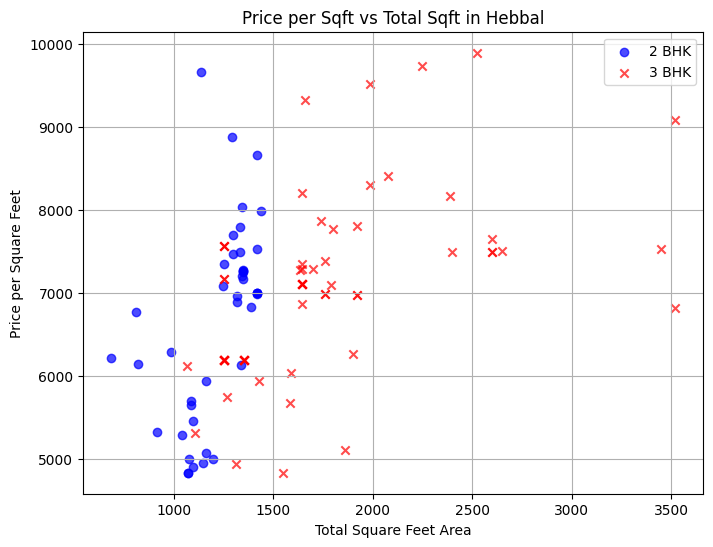

In [779]:
chart(df1,"Hebbal")    

In [780]:
# we should also remove properties where for same location, the price of 3 bhk less than 2 bhk (with same price_sqft, area)
def remove_pps_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_sqft < (stats['mean'])].index.values
                )
    return df.drop(exclude_indices, axis='index')


df1 = remove_pps_outliers(df1)
df1.shape

(7329, 7)

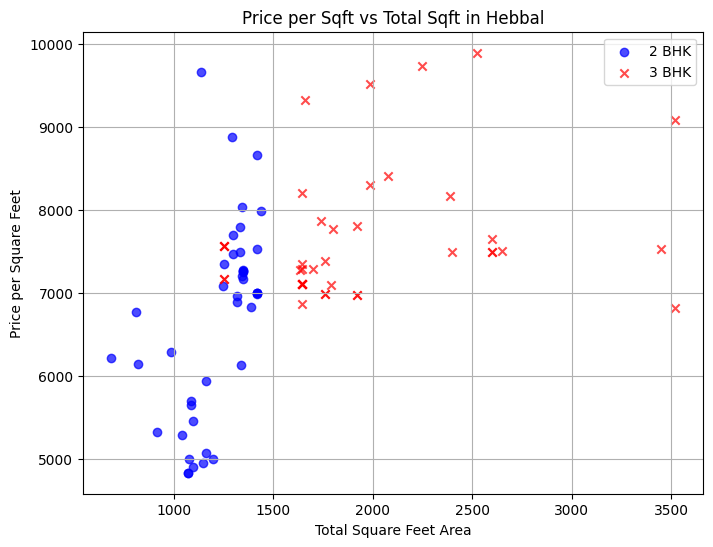

In [781]:
chart(df1,"Hebbal")    

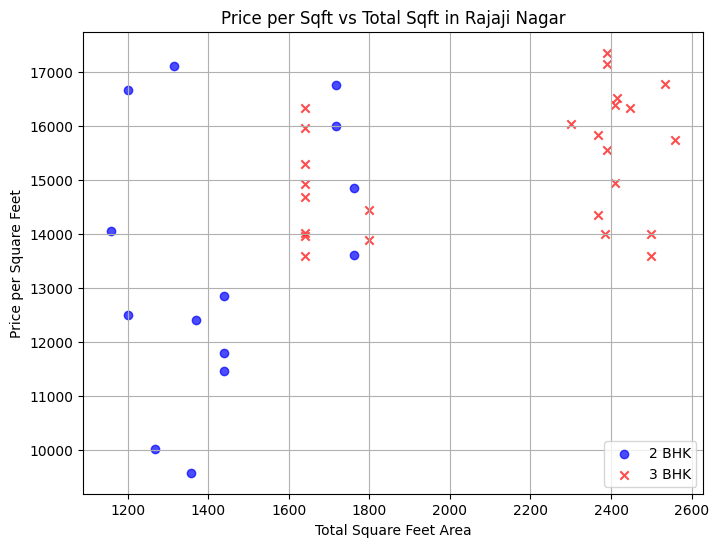

In [782]:
chart(df1,"Rajaji Nagar")    

Text(0, 0.5, 'Count')

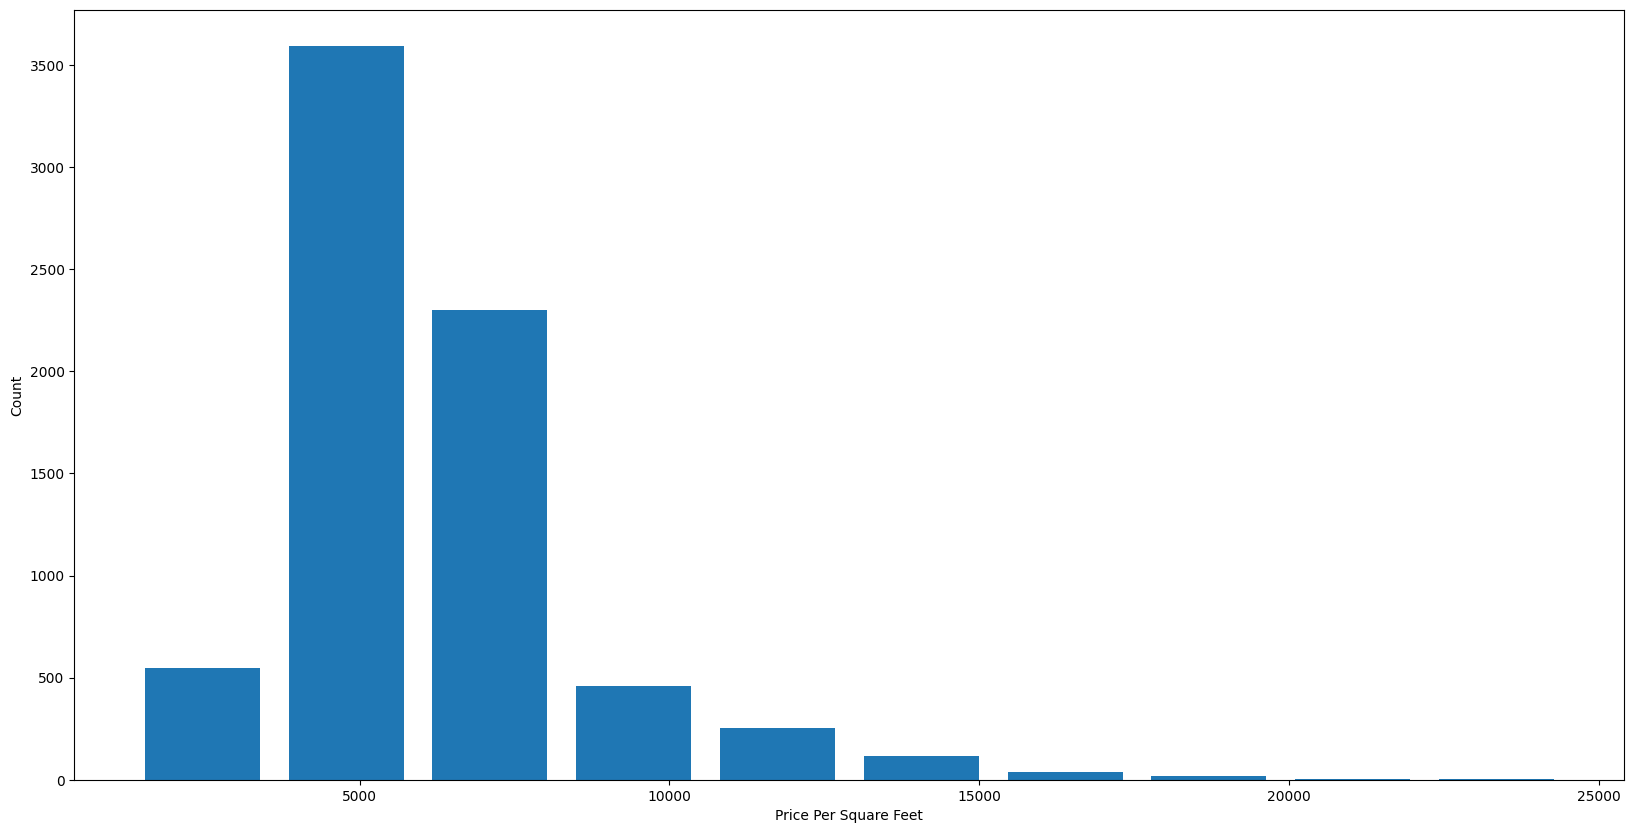

In [783]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df1.price_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [784]:
df1.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

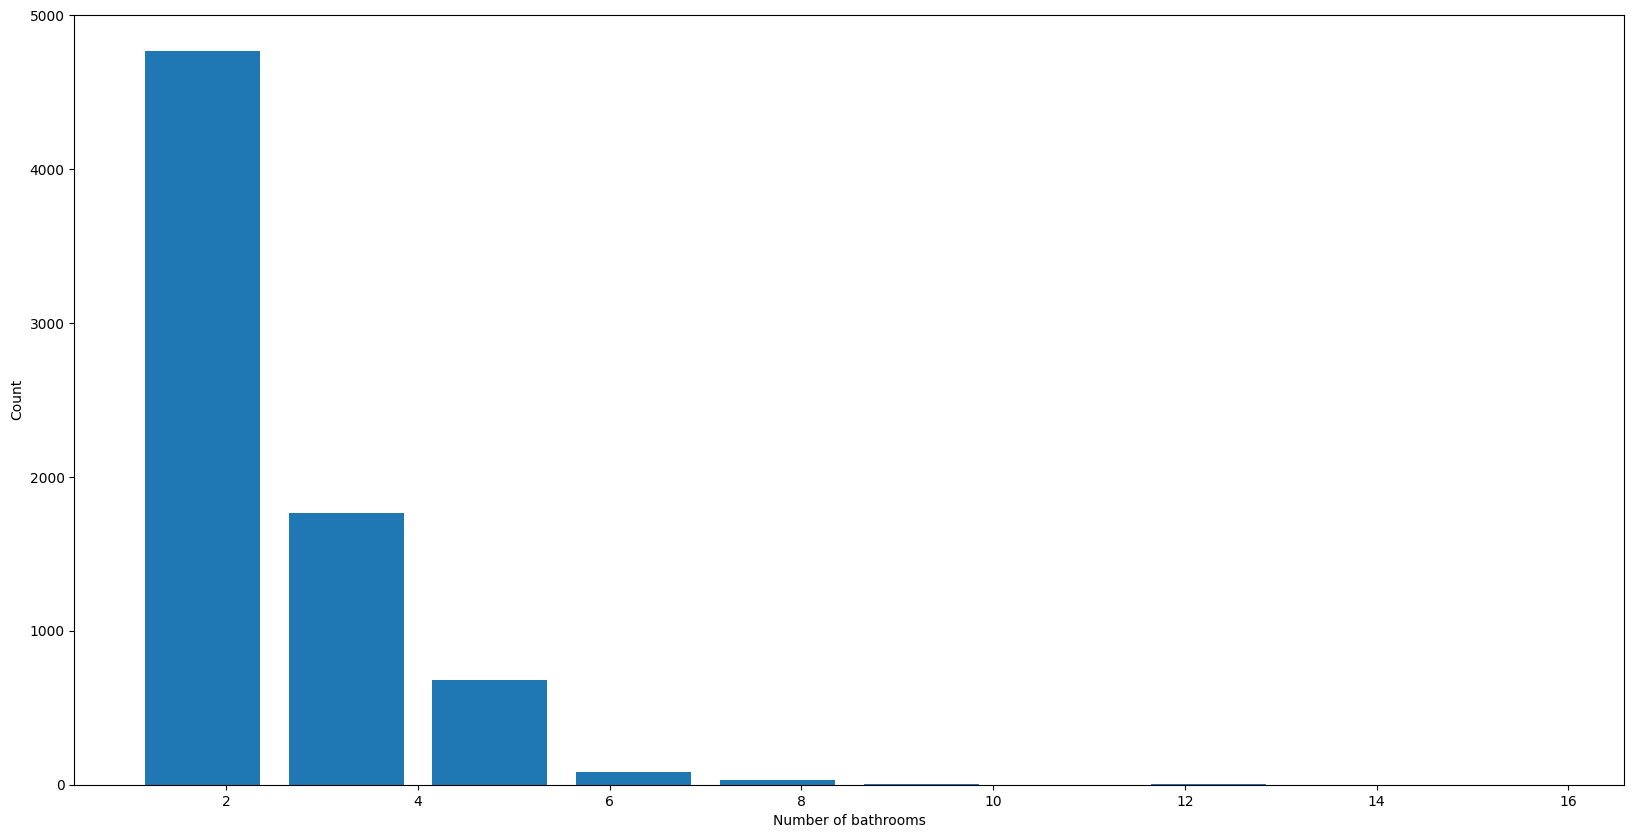

In [785]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [786]:
df1[df1.bath>10]

,location,size,total_sqft,bath,price,bhk,price_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [787]:
df1[df1.bath>df1.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [788]:
df1 = df1[df1.bath<df1.bhk+2]
df1.shape

(7251, 7)

In [789]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [790]:
df1 = df1.drop(['size','price_sqft'],axis='columns')
df1.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [791]:

dummies = pd.get_dummies(df1.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [792]:
df1 = pd.concat([df1,dummies.drop('other',axis='columns')],axis='columns')
df1.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [793]:
df1 = df1.drop('location',axis='columns')
df1.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [794]:
df1.shape


(7251, 245)

In [795]:
x,y= df1.drop(['price'],axis='columns'),df1['price']
df1.head()


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [796]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [797]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
ypred= model.predict(x_test)
ypred

array([69.95219529, 82.5686883 , 33.04759749, ..., 76.24777724,
       42.01702722, 51.75599983], shape=(2176,))

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 1572.1251750506199
Mean Absolute Error: 18.499108080795796
R2 Score: 0.8132115813256975
